In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib ipympl

import numpy as np
from DataHandler import DataHandler
from PWPolyTree_MIP import PieceWisePolyTree_MIP
from Tree import Tree
import pwlf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import pandas as pd

Graphviz not available, will fail if attempted to visualize a tree


In [2]:
pd.read_csv("data/slump_test.csv")["Fly ash"].unique().shape

(58,)

In [3]:
n_sample = 1000

In [4]:
# TODO aggregate the data as in the paper
data = pd.read_csv("data/slump_test.csv")
data_agg = data.groupby("Fly ash").aggregate("mean")

X = data_agg.index

# y = data_agg["SLUMP(cm)"]
y = data_agg["FLOW(cm)"]
# y = data_agg["Compressive Strength (28-day)(Mpa)"]
n_features = 1
X = X.to_numpy().reshape(-1, n_features)

In [5]:
dh = DataHandler(None, direct_data=(X, y, None, [f"x{i}" for i in range(n_features)], "Direct_data"))
X_train, y_train = dh.get_training_data(test_size=0)

# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=0)
# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=0, use_mse=True)
# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=1)
pwptree = PieceWisePolyTree_MIP(2, dh, poly_order=1)
# pwptree = PieceWisePolyTree_MIP(2, dh, poly_order=1, use_mse=True)
# pwptree = PieceWisePolyTree_MIP(3, dh, poly_order=1)

pwptree.make_model(X_train, y_train)

pwptree.optimize(time_limit=3000)
ctx = pwptree.get_base_context()
tree = Tree(ctx, dh)
ctx["status"]

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2433612
Gurobi 11.0.0 (beta1) - expires 2023-11-21
Academic license - for non-commercial use only - registered to nemecj38@fel.cvut.cz


'OPT'

In [6]:
X_space = np.linspace(X.min(), X.max(), n_sample).reshape((n_sample, n_features))

my_pwlf = pwlf.PiecewiseLinFit(X.flatten(), y, degree=1)
res = my_pwlf.fit(4)
pwlf_y = my_pwlf.predict(X_space.flatten())

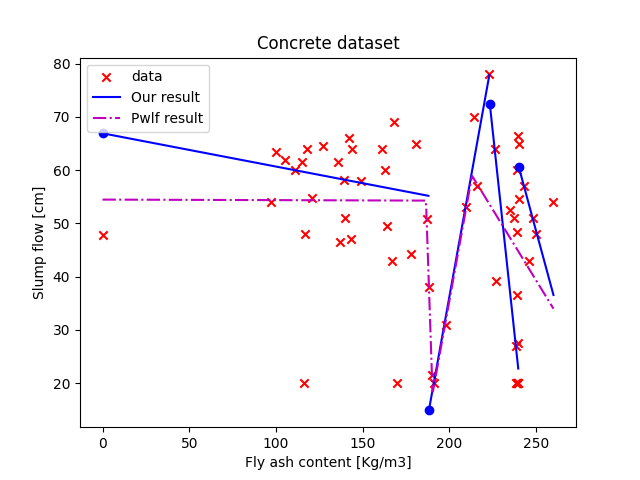

In [7]:
X_leaf = tree.get_assignment(X_space)

expo = pwptree.get_exponents(n_features)
leaf_values = dh.unnormalize_y(dh.normalize(X_space) @ expo @ ctx["poly_coeffs"] + ctx["intercepts"])

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X[:, 0], y, color="r", marker="x", label="data")
for li in range(leaf_values.shape[1]):
    ax.plot(X_space[X_leaf==li, 0], leaf_values[X_leaf==li, li], color="b", label="Our result" if li == 0 else None)
    ax.scatter(X_space[X_leaf==li, 0][0], leaf_values[X_leaf==li, li][0], color="b")
ax.plot(X_space, pwlf_y, "-.m", label="Pwlf result")
ax.legend()
ax.set_title("Concrete dataset")
ax.set_xlabel("Fly ash content [Kg/m3]")
ax.set_ylabel("Slump flow [cm]")
# ax.set_ylabel("Compressive Strength (28-day) [Mpa]")
plt.show()

# NHStemp

In [8]:
data = pd.read_csv("data/nhstemp.csv", names=["year","temp"])
X = data["year"]
y = data["temp"]
n_features = 1
X = X.to_numpy().reshape(-1, n_features)

In [9]:
dh = DataHandler(None, direct_data=(X, y, None, [f"x{i}" for i in range(n_features)], "Direct_data"))
X_train, y_train = dh.get_training_data(test_size=0)

# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=0)
# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=0, use_mse=True)
pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=1)
# pwptree = PieceWisePolyTree_MIP(2, dh, poly_order=1)
# pwptree = PieceWisePolyTree_MIP(2, dh, poly_order=1, use_mse=True)
# pwptree = PieceWisePolyTree_MIP(3, dh, poly_order=1)

pwptree.make_model(X_train, y_train)

pwptree.optimize()
ctx = pwptree.get_base_context()
tree = Tree(ctx, dh)
ctx["status"]

'OPT'

In [10]:
X_space = np.linspace(X.min(), X.max(), n_sample).reshape((n_sample, n_features))

my_pwlf = pwlf.PiecewiseLinFit(X.flatten(), y, degree=1)
res = my_pwlf.fit(2)
pwlf_y = my_pwlf.predict(X_space.flatten())

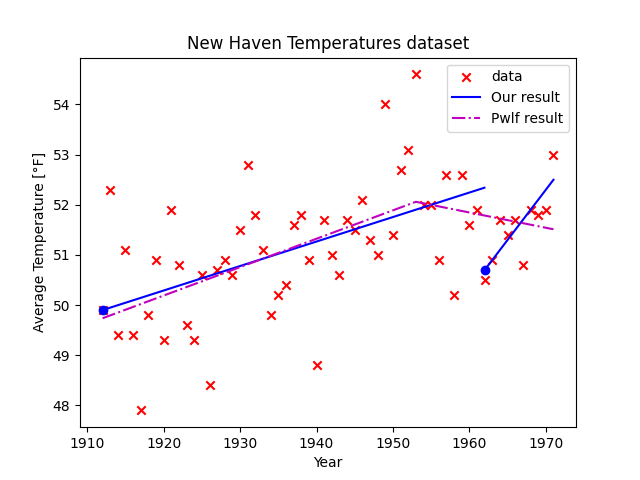

In [11]:
X_leaf = tree.get_assignment(X_space)

expo = pwptree.get_exponents(n_features)
leaf_values = dh.unnormalize_y(dh.normalize(X_space) @ expo @ ctx["poly_coeffs"] + ctx["intercepts"])

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X[:, 0], y, color="r", marker="x", label="data")
for li in range(leaf_values.shape[1]):
    ax.plot(X_space[X_leaf==li, 0], leaf_values[X_leaf==li, li], color="b", label="Our result" if li == 0 else None)
    ax.scatter(X_space[X_leaf==li, 0][0], leaf_values[X_leaf==li, li][0], color="b")
ax.plot(X_space, pwlf_y, "-.m", label="Pwlf result")
ax.legend()
ax.set_title("New Haven Temperatures dataset")
ax.set_xlabel("Year")
ax.set_ylabel("Average Temperature [°F]")
plt.show()

# Titanium

In [12]:
data = pd.read_csv("data/titanium.csv", names=["x","y"])
X = data["x"]
y = data["y"]
n_features = 1
X = X.to_numpy().reshape(-1, n_features)

In [64]:
%%time
dh = DataHandler(None, direct_data=(X, y, None, [f"x{i}" for i in range(n_features)], "Direct_data"))
X_train, y_train = dh.get_training_data(test_size=0)

# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=0)
# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=0, use_mse=True)
# pwptree = PieceWisePolyTree_MIP(1, dh, poly_order=1)
# pwptree = PieceWisePolyTree_MIP(2, dh, poly_order=1)
# pwptree = PieceWisePolyTree_MIP(2, dh, poly_order=1, use_mse=True)
pwptree = PieceWisePolyTree_MIP(3, dh, poly_order=1)

pwptree.make_model(X_train, y_train)

pwptree.optimize(time_limit=300)
ctx = pwptree.get_base_context()
tree = Tree(ctx, dh)
ctx["status"]

CPU times: user 54.3 s, sys: 1.12 s, total: 55.4 s
Wall time: 5.19 s


'OPT'

In [14]:
X_space = np.linspace(X.min(), X.max(), n_sample).reshape((n_sample, n_features))

my_pwlf = pwlf.PiecewiseLinFit(X.flatten(), y, degree=1)
res = my_pwlf.fit(8)
pwlf_y = my_pwlf.predict(X_space.flatten())

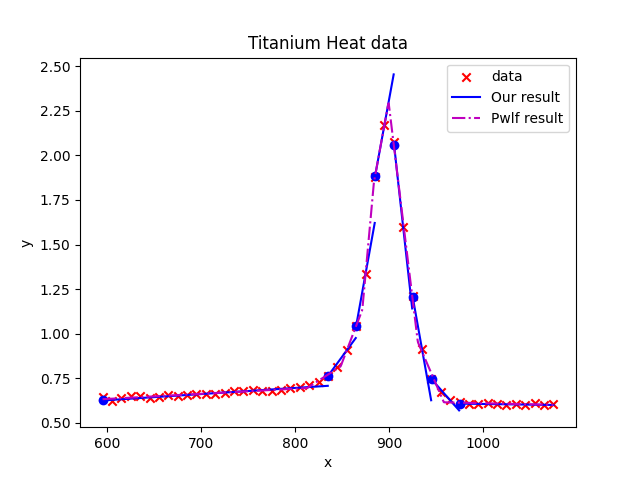

In [15]:
X_leaf = tree.get_assignment(X_space)

expo = pwptree.get_exponents(n_features)
leaf_values = dh.unnormalize_y(dh.normalize(X_space) @ expo @ ctx["poly_coeffs"] + ctx["intercepts"])

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X[:, 0], y, color="r", marker="x", label="data")
for li in range(leaf_values.shape[1]):
    ax.plot(X_space[X_leaf==li, 0], leaf_values[X_leaf==li, li], color="b", label="Our result" if li == 0 else None)
    ax.scatter(X_space[X_leaf==li, 0][0], leaf_values[X_leaf==li, li][0], color="b")
ax.plot(X_space, pwlf_y, "-.m", label="Pwlf result")
ax.legend()
ax.set_title("Titanium Heat data")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

# Extra

In [63]:
%%time
from PWPolyDirect_MIP import PieceWisePolyDirect_MIP

pwpdirect = PieceWisePolyDirect_MIP(8, dh, poly_order=1)

pwpdirect.make_model(X_train, y_train)

pwpdirect.optimize()
ctx = pwpdirect.get_base_context()

ctx["status"]

CPU times: user 50.3 s, sys: 1.32 s, total: 51.6 s
Wall time: 7.29 s


'OPT'

In [65]:
segment_values = dh.unnormalize_y(dh.normalize(X_space) @ ctx["slopes"].reshape(1,-1) + ctx["intercepts"])

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X[:, 0], y, color="r", marker="x", label="data")
# for li in range(leaf_values.shape[1]):
#     ax.plot(X_space[X_leaf==li, 0], leaf_values[X_leaf==li, li], color="b", label="Our result" if li == 0 else None)
#     ax.scatter(X_space[X_leaf==li, 0][0], leaf_values[X_leaf==li, li][0], color="b")
for j in range(ctx["segments"]):
    relev = (dh.normalize(X_space)[:,0] <= ctx["breakpoints"][j+1]) & (dh.normalize(X_space)[:,0] >= ctx["breakpoints"][j])
    ax.plot(X_space[relev, 0], segment_values[relev, j], color="k", label="Our result - direct" if j == 0 else None)
    # ax.scatter(X_space[relev, 0][0], segment_values[relev, li][0], color="k")
ax.plot(X_space, pwlf_y, "-.m", label="Pwlf result")
ax.legend()
ax.set_title("Titanium Heat data")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

KeyError: 'slopes'